# <font color='Orange'>Hope everyone who reads this notebook finds it helpful. Do upvote it. Thank You 🙏😃

# <font color ='torcous'>EMNIST Letter Dataset with 96.7% accuracy 

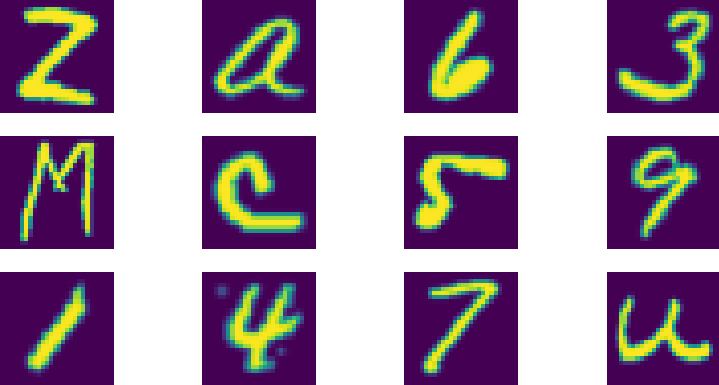

## <font color='#00B2FF'> The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset .


## Here we are specifically using EMNIST letter dataset. So Let's get started

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [43]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('./emnist-letters-test.csv')
training_letter = pd.read_csv('./emnist-letters-train.csv')

In [44]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [45]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


## Let's see what type of images we have got. 

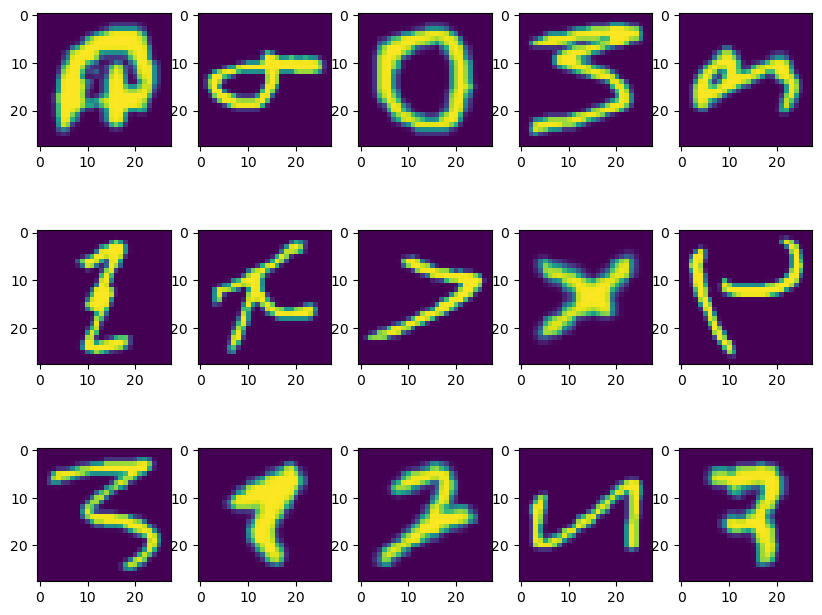

In [46]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))


In [47]:
import tensorflow as tf

In [48]:
import sys
print(sys.version)

3.9.13 (main, Oct 13 2022, 21:23:06) [MSC v.1916 64 bit (AMD64)]


# Preprocesssing

# 1. Normalisation and reshaping of data

### Before feeding in the data to the model we will normalise and reshape the data given to us. This will decrease the complexity of the models and make the model work efficiently as less complex numbers will be there to process.

the max pixel value in grayscale being 255 i am dividing the pixels by 255

In [49]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]

print(train_images_number)

train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

print(train_images.shape)

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)
# This is to set the height or depth as 1 unit.

print(train_images.shape)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

88799
(88799, 784)
(88799, 28, 28, 1)


In [50]:
print(y1)
print(y1.shape)
print(y1[0])
b=[0,1,2,3]
b=np.array(b)
print(np.array(b))
print(b.shape)
a = tf.keras.utils.to_categorical(b, num_classes=37)
print(a.shape)

[ 7 16 15 ...  1 23 12]
(88799,)
7
[0 1 2 3]
(4,)
(4, 37)


In [51]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

print(y1.shape)

(88799, 37)


# Lets create a CNN for the classification of these random images.

In [52]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [57]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)), #这是第一层，可以定义input_shape参数；32是输出的维度；3是指kernel宽和高都是3;所以输出是26x26x32的下一层。每个kernel中的weight都不一样
    tf.keras.layers.MaxPooling2D(2,2), #从2x2共4个数字中，选择最大的数字作为输出
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #将图像的格式从2d阵列（28乘28像素）转换为28 * 28 = 784像素的1d阵列。该层没有要学习的参数; 它只重新格式化数据
    tf.keras.layers.Dense(512,activation='relu'), #全连接层
    tf.keras.layers.Dense(128,activation='relu'),#全连接层
    tf.keras.layers.Dense(number_of_classes,activation='softmax')#输出层
])

In [59]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
#配置训练方法
#优化器是 RMSprop算法。RMSProp在非凸条件下结果更好，改变梯度累积为指数衰减的移动平均以丢弃遥远的过去历史
#loss函数是交叉熵损失函数
#评价标准是精度。即Calculates how often predictions equal labels.

## Adding Callback API's to save best weights and change lr

In [14]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
#ModelCheckpoint函数用来在每个epoch结束时保存最好的模型权重
#verbose=1表示保存时输出信息到控制台；monitor='val_accuracy'表示监控validation set的准确率指标；mode='max'表示要最大化monitor的指标
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
#EarlyStopping函数用来在模型停止改善时，提前结束训练
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [15]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Train on 71039 samples, validate on 17760 samples
Epoch 1/10
70976/71039 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.8257
Epoch 00001: val_accuracy improved from -inf to 0.86881, saving model to Best_points.h5
71039/71039 [==============================] - 43s 610us/sample - loss: 0.5553 - accuracy: 0.8257 - val_loss: 0.4165 - val_accuracy: 0.8688
Epoch 2/10
70944/71039 [============================>.] - ETA: 0s - loss: 0.2793 - accuracy: 0.9096
Epoch 00002: val_accuracy improved from 0.86881 to 0.90298, saving model to Best_points.h5
71039/71039 [==============================] - 42s 588us/sample - loss: 0.2792 - accuracy: 0.9096 - val_loss: 0.3022 - val_accuracy: 0.9030
Epoch 3/10
70944/71039 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9272
Epoch 00003: val_accuracy did not improve from 0.90298
71039/71039 [==============================] - 44s 621us/sample - loss: 0.2188 - accuracy: 0.9271 - val_loss: 0.3394 - val_accuracy: 0.8

## Let's plot Accuracy vs Val_Accuracy to further evaluation..

In [16]:
import seaborn as sns

Text(0, 0.5, 'Accuray')

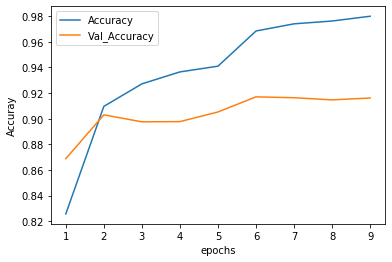

In [17]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

## Changing the test_split size to 0.15 to see if validation score increases or not

In [18]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)

In [19]:
history1 = model.fit(train_x2,train_y2,epochs=10,validation_data=(test_x2,test_y2))

Train on 75479 samples, validate on 13320 samples
Epoch 1/10
75479/75479 [==============================] - 56s 736us/sample - loss: 0.0805 - accuracy: 0.9729 - val_loss: 0.3644 - val_accuracy: 0.9190
Epoch 2/10
75479/75479 [==============================] - 52s 691us/sample - loss: 0.0722 - accuracy: 0.9747 - val_loss: 0.3781 - val_accuracy: 0.9185
Epoch 3/10
75479/75479 [==============================] - 53s 705us/sample - loss: 0.0662 - accuracy: 0.9764 - val_loss: 0.3938 - val_accuracy: 0.9181
Epoch 4/10
75479/75479 [==============================] - 53s 704us/sample - loss: 0.0618 - accuracy: 0.9773 - val_loss: 0.3825 - val_accuracy: 0.9129
Epoch 5/10
75479/75479 [==============================] - 54s 719us/sample - loss: 0.0585 - accuracy: 0.9786 - val_loss: 0.4153 - val_accuracy: 0.9160
Epoch 6/10
75479/75479 [==============================] - 57s 755us/sample - loss: 0.0560 - accuracy: 0.9791 - val_loss: 0.4163 - val_accuracy: 0.9143
Epoch 7/10
75479/75479 [====================

Text(0, 0.5, 'Accuray')

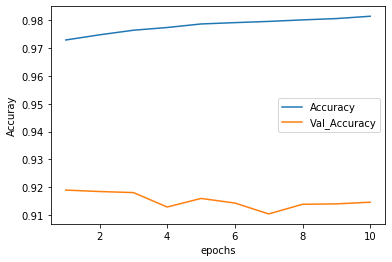

In [20]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

# As the validation score score went down we won't be changing the test_split size. 
# Thus the above model is better than the latter one.

## Hope everyone who reads this notebook finds it helpful. 
## Do upvote it. Thank You🙏😃